# Midterm Project 4 (100 points total)

## In this project, you need to use unsupervised learning on genetic data: Reduce the dimensionality of the dataset with each feature as a genetic expression (DNA microarray) and then group the leukemia patients by K-means clustering.

### Import the necessary libraries. (5 points)

In [1]:
#Import the necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA



### Upload the data and preprocess it. (10 points)

In [2]:
# Upload the data to a Dataframe.
data = pd.read_csv("gene_expression_data.csv")
# Note that some columns have non-numeric information which we do not need for our models. Discard those columns.
# Hint: You can use indexing (much faster) or a loop.

data = data[data.columns.drop(list(data.filter(regex='call')))]


# Transpose the dataset so that each patient is in a row.
data = data.T
X = data

# Get rid of the headers which are not needed for numeric analysis.
X = X.drop(['Gene Description','Gene Accession Number'],axis=0)
X.index = pd.to_numeric(X.index)

# Lastly, scale the dataset. You can use any type of scaling (implemented or from a library) we have covered in class.
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


### Apply Principle Component Analysis (PCA) to the preprocessed dataset to reduce its dimensionality. (10 points)

In [3]:
# Create a PCA object that would preserve 98% of the variance in the dataset.
# pca1 = PCA(n_components=X.shape[1], svd_solver='full')
pca1 = PCA(0.98)



# Transform the data.
X_pca1 = pca1.fit_transform(X)



### Question 1: You cannot apply PCA for more than 38 dimensions, even though the dimensionality of the original data is way higher than that. (You can try and see for yourself.) What is the reason for this? (10 points)

In [4]:
print("PCA can only be applied to a dataset which is less than the minimum number of the size of the dataset because the variance  in PCA means the amount of information retained from the original data. If we try to apply PCA for more than 38 dimensions then we are trying to retain information from the data which does not exist")

PCA can only be applied to a dataset which is less than the minimum number of the size of the dataset because the variance  in PCA means the amount of information retained from the original data. If we try to apply PCA for more than 38 dimensions then we are trying to retain information from the data which does not exist


### Create a new PCA object that reduces the dimensionality of the dataset to 2. Then, apply K-means clustering to the two-dimensional data and find the number of clusters that you think is best. (Using a heuristic method we have covered in class.)  (25 points)

[0.15655655 0.11570855]
[55.53334636 41.04384602]


C:\Users\bhagy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


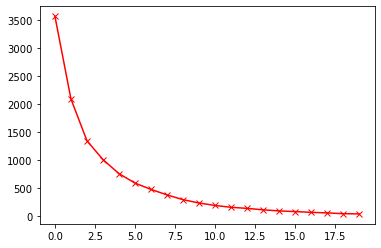

[2 1 4 2 1 2 2 4 1 0 1 0 1 1 1 1 3 0 0 5 0 0 2 1 0 0 4 2 2 2 2 2 2 0 2 2 2
 4]


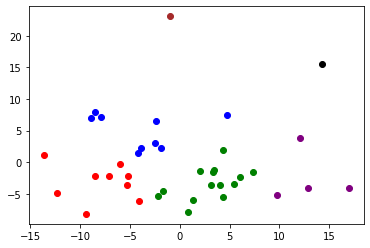

In [5]:
# Create a new PCA object that creates a two-dimensional dataset.
pca2 = PCA(n_components = 2)


# Reduce the dimensionality of the dataset and print the variance captured by this new 2-dim dataset.
X_pca2 = pca2.fit_transform(X)
print(pca2.explained_variance_ratio_)
print(pca2.explained_variance_)

# Apply K-Means clustering from 1 to 20 clusters. Plot the inertia graph for all K values.

scores = []
for ii in range(1,21):
    kmeans = KMeans(n_clusters=ii)
    kmeans.fit(X_pca2)
    scores.append(kmeans.inertia_)
    
plt.plot(scores, '-rx')
plt.show()



# Pick the K value that you think is best; create a K-means object with that value and extract the cluster labels.
kmeans_best = KMeans(n_clusters=6, random_state=42)
kmeans_best.fit(X_pca2)
# labels = kmeans_best.fit_predict(X_pca2)
labels = kmeans_best.labels_
print(labels)


# Plot the two-dimensional dataset, color coding different clusters.
label0 = X_pca2[labels == 0]
label1 = X_pca2[labels == 1]
label2 = X_pca2[labels == 2]
label3 = X_pca2[labels == 3]
label4 = X_pca2[labels == 4]
label5 = X_pca2[labels == 5]

plt.scatter(label0[:, 0], label0[:, 1], color = 'red')
plt.scatter(label1[:, 0], label1[:, 1], color = 'blue')
plt.scatter(label2[:, 0], label2[:, 1], color = 'green')
plt.scatter(label3[:, 0], label3[:, 1], color = 'black')
plt.scatter(label4[:, 0], label4[:, 1], color = 'purple')
plt.scatter(label5[:, 0], label5[:, 1], color = 'brown')
plt.show()






### Question 2: What do you see in the clustered data plot? Interpret the output, keeping in mind the amount of variance captured by the low-dimensional dataset and the shortcomings of K-means clustering. (15 points)

In [9]:
print("The data plot highlights the 6 clusters. This pca object with 2 dimensions gives 0.156 and 0.1157 ratio. This indicates the amount of information retained from the original data and this means that with just 2 dimensions we can visualise the clusters but we lose a lot of information. Sometimes there are outliers like there is a datapoint in black color and one in brown color which are far away from others and probably should not be considered as separate clusters")

The data plot highlights the 6 clusters. This pca object with 2 dimensions gives 0.156 and 0.1157 ratio. This indicates the amount of information retained from the original data and this means that with just 2 dimensions we can visualise the clusters but we lose a lot of information. Sometimes there are outliers like there is a datapoint in black color and one in brown color which are far away from others and probably should not be considered as separate clusters


### Lastly, use the dataset that captures 98% of the variance of the original data and apply K-means clustering to it. Using the same heuristic method, find the best number of clusters. (10 points)

C:\Users\bhagy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


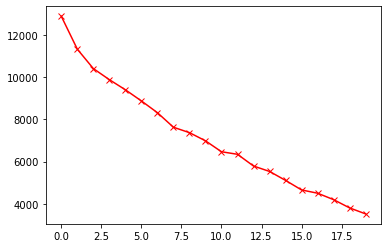

Based on the elbow rule the optimum number of clusters can be taken as 10.


In [7]:
# Apply K-Means clustering from 1 to 20 clusters. Plot the inertia graph for all values.
scores2 = []
for ii in range(1,21):
    kmeans = KMeans(n_clusters=ii)
    kmeans.fit(X_pca1)
    scores2.append(kmeans.inertia_)
    
plt.plot(scores2, '-rx')
plt.show()

# Print the optimum number of clusters.
# kmeans_best2 = KMeans(n_clusters=10, random_state=42)
# kmeans_best2.fit(X_pca1)
# labels = kmeans_best2.fit_predict(X_pca1)
print("Based on the elbow rule the optimum number of clusters can be taken as 10.")





### Question 3: What is the best number of clusters? Can we visualize these clusters? What does all this tell about using K-means clustering method for high-dim data? What would you propose to improve the clustering results? (15 points)

In [10]:
print("According to Elbow rule, the WCSS value tends to decrease as the number of clusters increases and judging from the plot it seems like choosing 10 clusters is ideal for this scenario. We cannot visualise the clusters because the number of dimensions of the dataset to which Kmeans is applied is too high. DB scan can help in this scenario because we do not need to choose the number of clusters ourselves. The algorithm will decide the number of clusters based on the tolerance and converge to the optimum number of clusters. In order to improve the clustering results we can use Silhouette Method. If the average distance of a point with other points in the same cluster is greater than the average distance between the point with other points in the other clusters then that point can't be considered as part of that cluster. The silhouette value coefficient can calculated and plotted similar to inertia graph in order to determine the correct number of clusters ")

According to Elbow rule, the WCSS value tends to decrease as the number of clusters increases and judging from the plot it seems like choosing 10 clusters is ideal for this scenario. We cannot visualise the clusters because the number of dimensions of the dataset to which Kmeans is applied is too high. DB scan can help in this scenario because we do not need to choose the number of clusters ourselves. The algorithm will decide the number of clusters based on the tolerance and converge to the optimum number of clusters. In order to improve the clustering results we can use Silhouette Method. If the average distance of a point with other points in the same cluster is greater than the average distance between the point with other points in the other clusters then that point can't be considered as part of that cluster. The silhouette value coefficient can calculated and plotted similar to inertia graph in order to determine the correct number of clusters 
